In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [3]:
os.listdir('UTKFace')

['9_1_2_20161219204347420.jpg.chip.jpg',
 '36_0_1_20170117163203851.jpg.chip.jpg',
 '86_1_0_20170120225751953.jpg.chip.jpg',
 '26_1_0_20170116171048641.jpg.chip.jpg',
 '1_1_2_20161219154612988.jpg.chip.jpg',
 '52_0_1_20170117161018159.jpg.chip.jpg',
 '25_1_0_20170117134403373.jpg.chip.jpg',
 '16_0_0_20170104003740977.jpg.chip.jpg',
 '27_0_3_20170119210058457.jpg.chip.jpg',
 '36_0_3_20170119180245724.jpg.chip.jpg',
 '58_0_2_20170116193704928.jpg.chip.jpg',
 '6_1_0_20170114024512634.jpg.chip.jpg',
 '35_1_2_20170116185947151.jpg.chip.jpg',
 '1_1_3_20161219230734016.jpg.chip.jpg',
 '26_1_1_20170103181931657.jpg.chip.jpg',
 '2_0_2_20161219141650121.jpg.chip.jpg',
 '53_1_0_20170110143534851.jpg.chip.jpg',
 '35_0_3_20170119201304861.jpg.chip.jpg',
 '23_1_0_20170117142807780.jpg.chip.jpg',
 '24_0_3_20170119152239904.jpg.chip.jpg',
 '26_1_2_20170116182434267.jpg.chip.jpg',
 '75_0_0_20170117204739711.jpg.chip.jpg',
 '36_1_4_20170104172843788.jpg.chip.jpg',
 '23_1_0_20170116222839270.jpg.chip.jpg

In [4]:
sample_list = os.listdir('UTKFace')

In [5]:
path = 'UTKFace/' + sample_list[0]
image = cv2.imread(path)
cv2.imshow(image)

error: OpenCV(4.5.4-dev) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


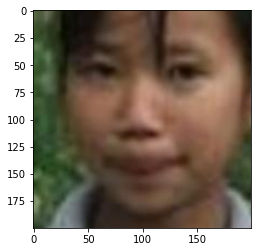

In [6]:
img = load_img(path)
plt.imshow(img)
plt.show()

In [10]:
#path_nrml = 
path = []
for i in range(0,len(sample_list)):
    path.append('UTKFace/' + sample_list[i])

In [12]:
age = []
sex = []
race = []
for i in range(0,len(sample_list)):
    l = list(map(int,sample_list[i][:10].split('_')))
    age.append(l[0])
    sex.append(l[1])
    race.append(l[2])

In [13]:
print(path[0],age[0],sex[0],race[0])

UTKFace/9_1_2_20161219204347420.jpg.chip.jpg 9 1 2


In [11]:
path

['UTKFace/9_1_2_20161219204347420.jpg.chip.jpg',
 'UTKFace/36_0_1_20170117163203851.jpg.chip.jpg',
 'UTKFace/86_1_0_20170120225751953.jpg.chip.jpg',
 'UTKFace/26_1_0_20170116171048641.jpg.chip.jpg',
 'UTKFace/1_1_2_20161219154612988.jpg.chip.jpg',
 'UTKFace/52_0_1_20170117161018159.jpg.chip.jpg',
 'UTKFace/25_1_0_20170117134403373.jpg.chip.jpg',
 'UTKFace/16_0_0_20170104003740977.jpg.chip.jpg',
 'UTKFace/27_0_3_20170119210058457.jpg.chip.jpg',
 'UTKFace/36_0_3_20170119180245724.jpg.chip.jpg',
 'UTKFace/58_0_2_20170116193704928.jpg.chip.jpg',
 'UTKFace/6_1_0_20170114024512634.jpg.chip.jpg',
 'UTKFace/35_1_2_20170116185947151.jpg.chip.jpg',
 'UTKFace/1_1_3_20161219230734016.jpg.chip.jpg',
 'UTKFace/26_1_1_20170103181931657.jpg.chip.jpg',
 'UTKFace/2_0_2_20161219141650121.jpg.chip.jpg',
 'UTKFace/53_1_0_20170110143534851.jpg.chip.jpg',
 'UTKFace/35_0_3_20170119201304861.jpg.chip.jpg',
 'UTKFace/23_1_0_20170117142807780.jpg.chip.jpg',
 'UTKFace/24_0_3_20170119152239904.jpg.chip.jpg',
 'UTK

In [14]:
df = {}
df['Path'] = path
df['Age'] = age
df['Sex'] = sex
df['Race'] = race

In [15]:
df

{'Path': ['UTKFace/9_1_2_20161219204347420.jpg.chip.jpg',
  'UTKFace/36_0_1_20170117163203851.jpg.chip.jpg',
  'UTKFace/86_1_0_20170120225751953.jpg.chip.jpg',
  'UTKFace/26_1_0_20170116171048641.jpg.chip.jpg',
  'UTKFace/1_1_2_20161219154612988.jpg.chip.jpg',
  'UTKFace/52_0_1_20170117161018159.jpg.chip.jpg',
  'UTKFace/25_1_0_20170117134403373.jpg.chip.jpg',
  'UTKFace/16_0_0_20170104003740977.jpg.chip.jpg',
  'UTKFace/27_0_3_20170119210058457.jpg.chip.jpg',
  'UTKFace/36_0_3_20170119180245724.jpg.chip.jpg',
  'UTKFace/58_0_2_20170116193704928.jpg.chip.jpg',
  'UTKFace/6_1_0_20170114024512634.jpg.chip.jpg',
  'UTKFace/35_1_2_20170116185947151.jpg.chip.jpg',
  'UTKFace/1_1_3_20161219230734016.jpg.chip.jpg',
  'UTKFace/26_1_1_20170103181931657.jpg.chip.jpg',
  'UTKFace/2_0_2_20161219141650121.jpg.chip.jpg',
  'UTKFace/53_1_0_20170110143534851.jpg.chip.jpg',
  'UTKFace/35_0_3_20170119201304861.jpg.chip.jpg',
  'UTKFace/23_1_0_20170117142807780.jpg.chip.jpg',
  'UTKFace/24_0_3_2017011915

In [19]:
dp = pd.DataFrame(df)

In [22]:
#dp.to_csv('main_dataset.csv')

Untill this part of the code we created the dataset as per our use. In the next part we will be working on creating the train and test datasets and then we will be working on our models.